In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Country-data (1).csv')
df.head() 

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
df.shape

(167, 10)

In [4]:
df.isnull().sum().sum()

0

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


<function matplotlib.pyplot.show(close=None, block=None)>

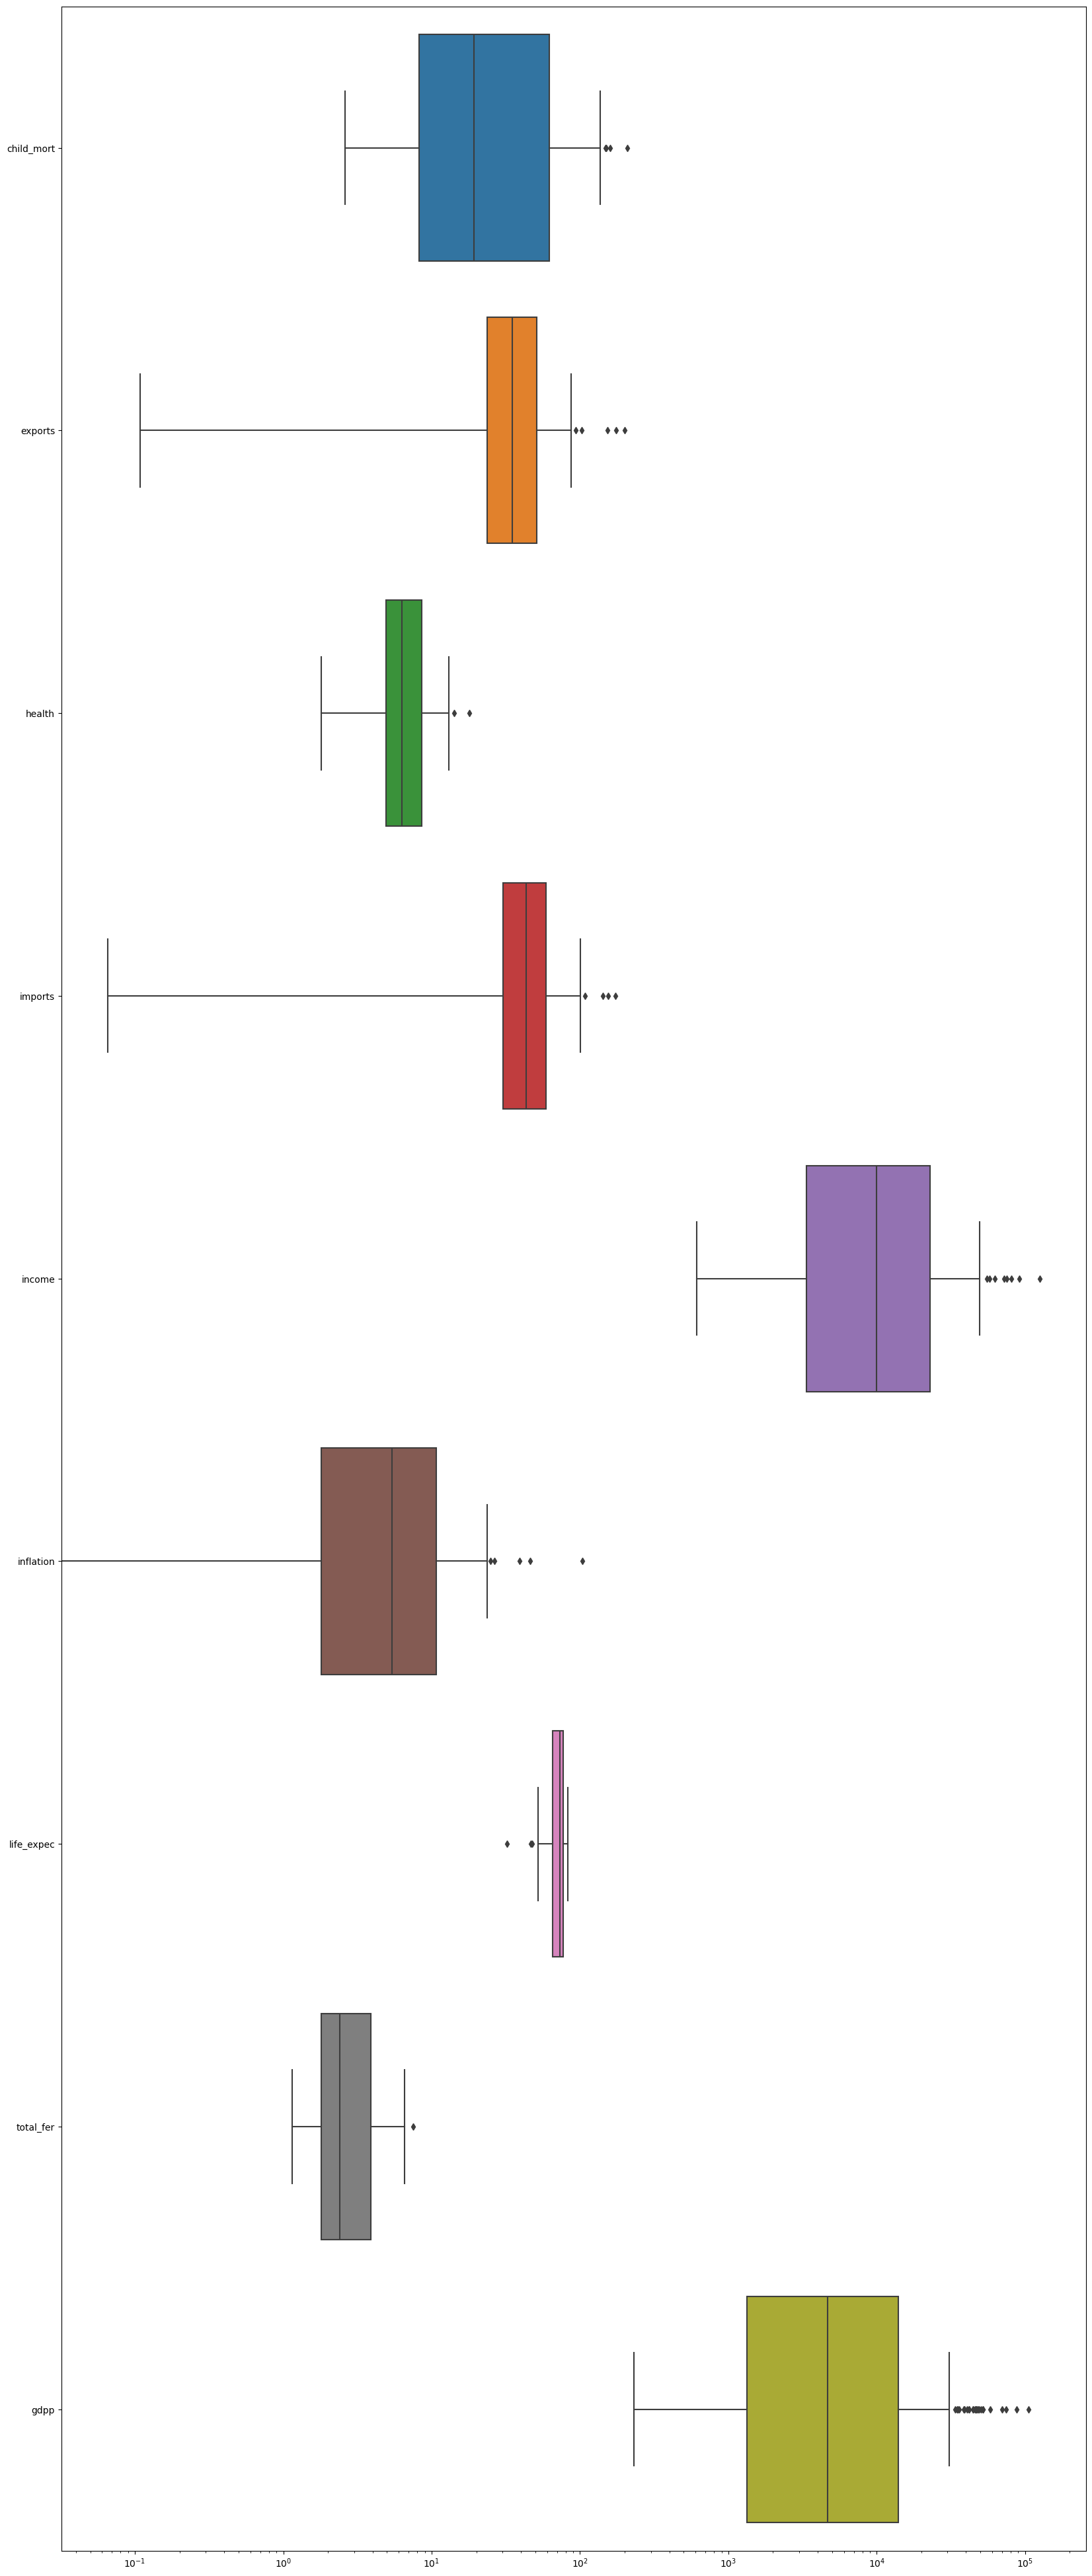

In [10]:
%matplotlib inline

plt.figure(figsize = (20,50))
ax = sns.boxplot(data = df, orient = "h")
ax.set(xscale = "log")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

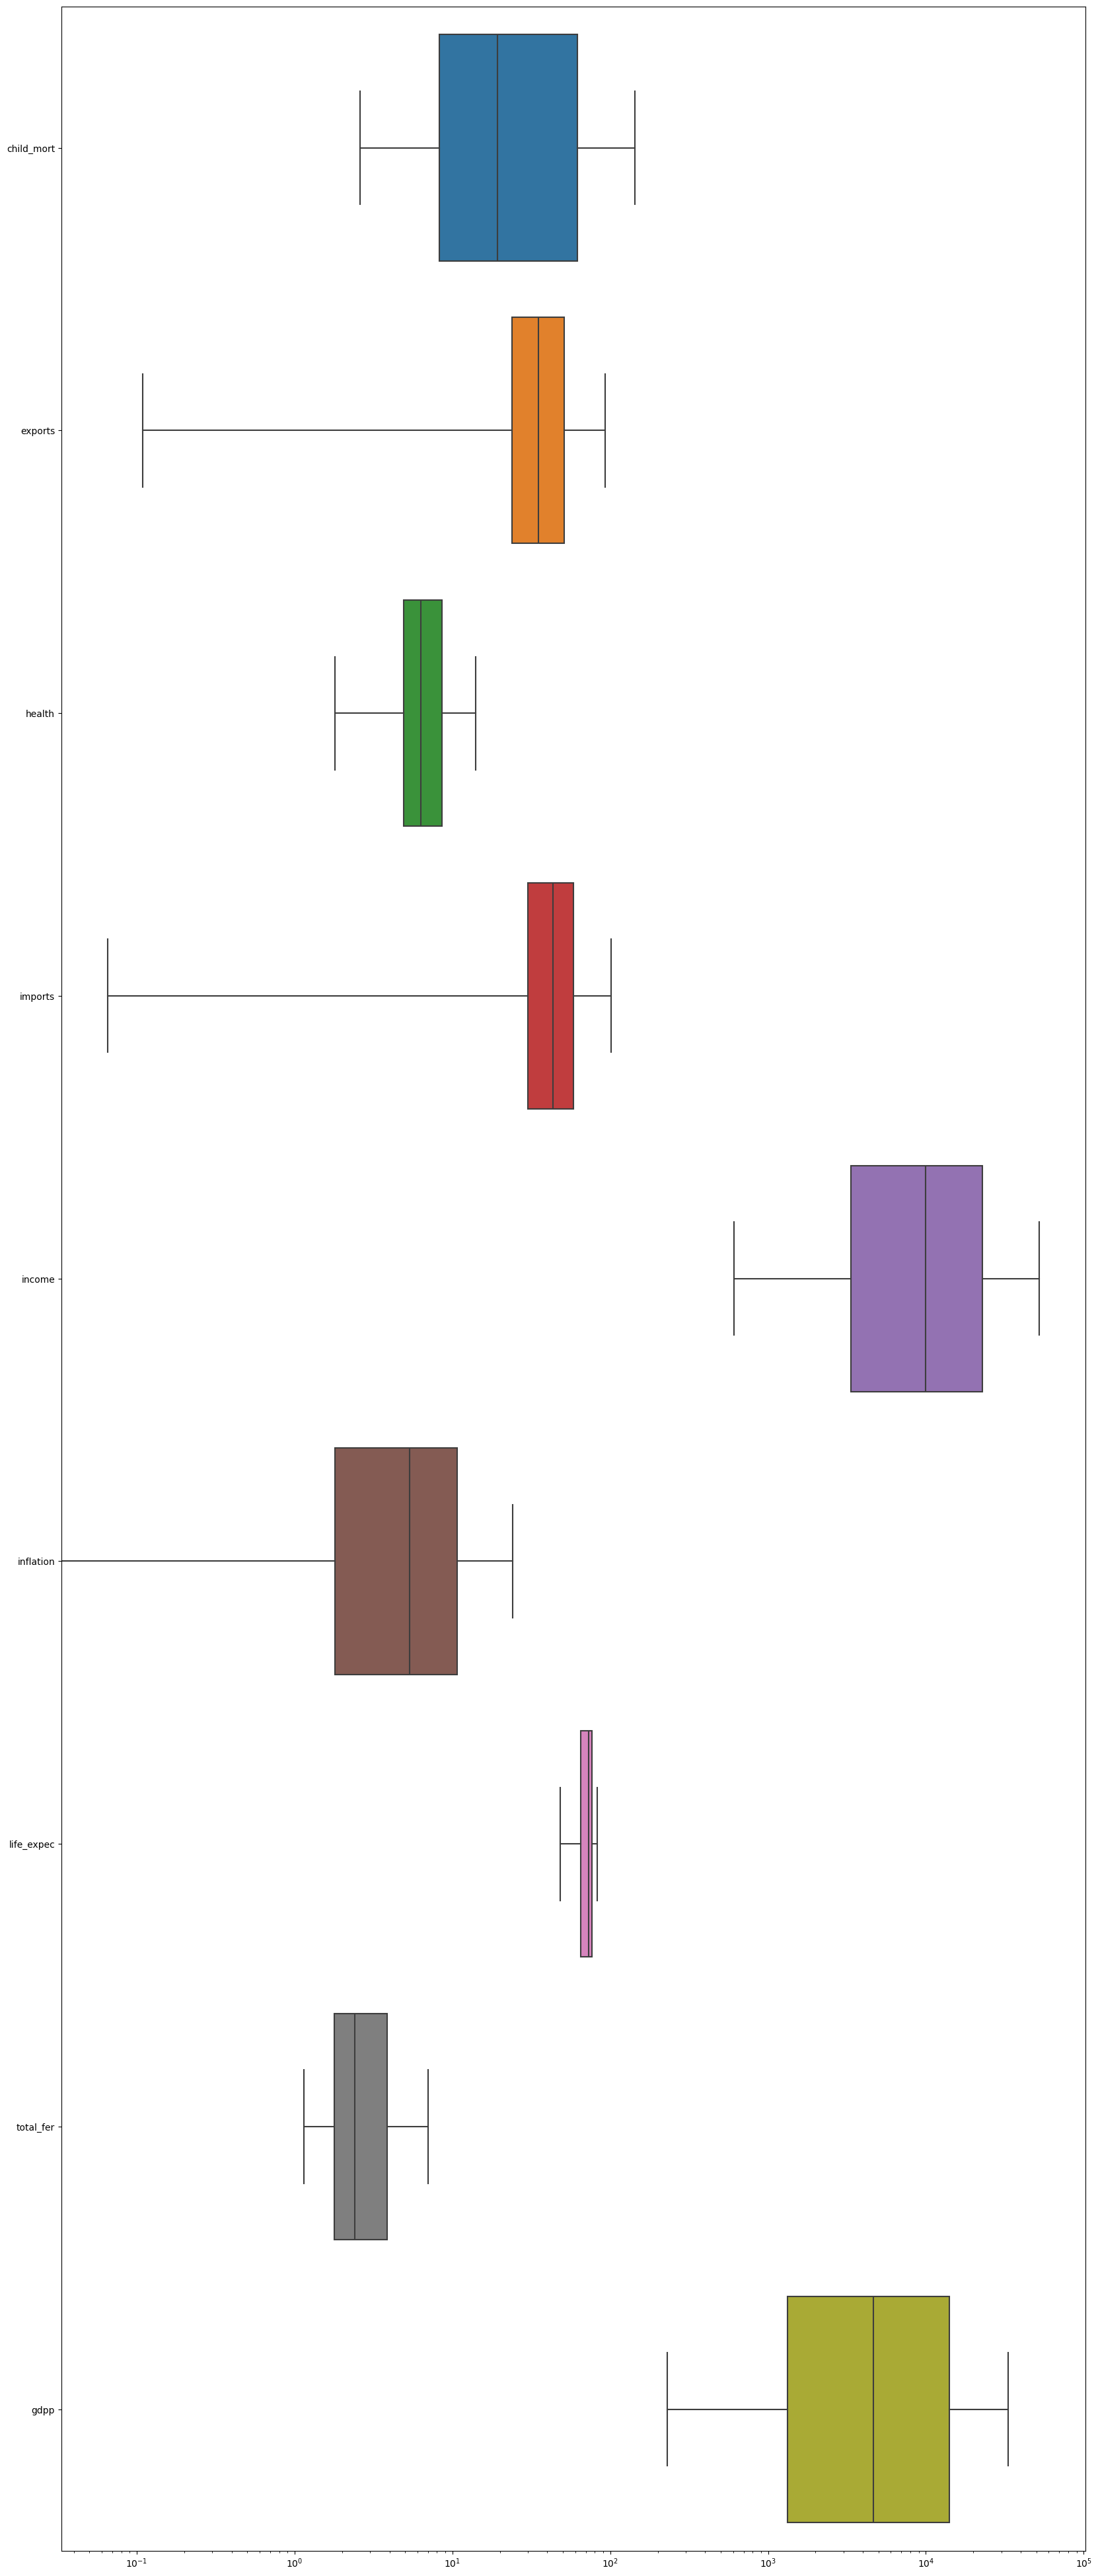

In [11]:
# replace outliers with lower and upper bonds
def boxplot_clip(col):
    q1 = df.loc[:, col].quantile(0.25)
    q3 = df.loc[:, col].quantile(0.75)
    iqr = q3 - q1
    upperbound = q3 + 1.5 * iqr
    lowerbound = q1 - 1.5 * iqr 
    df[col] = df[col].clip(lowerbound, upperbound)
    

for i in df.select_dtypes(include=np.number).columns.tolist(): 
    boxplot_clip(i)

%matplotlib inline

plt.figure(figsize = (20,50))
ax = sns.boxplot(data = df, orient = "h")
ax.set(xscale = "log")
plt.show

In [12]:
features=df.columns[1:]
df[features] # df without country column

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950.0,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500.0,24.16,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490.0,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480.0,23.60,67.5,4.67,1310


In [13]:
# Scaled data in purpose using it in PCA, then use this new reduced data in K-Means and Hier clustering 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

scaler=StandardScaler()
df_scaled= scaler.fit_transform(df[features])
df_scaled

array([[ 1.36980194, -1.39110684,  0.29601312, ..., -1.70222504,
         1.91527602, -0.84634107],
       [-0.55046422, -0.54354731, -0.09119005, ...,  0.66332125,
        -0.86277926, -0.54082746],
       [-0.27129509, -0.05384625, -0.98589252, ...,  0.68685903,
        -0.03669088, -0.50886816],
       ...,
       [-0.37565738,  1.52826487,  0.01782832, ...,  0.28671687,
        -0.66291917, -0.78095407],
       [ 0.48533152, -0.44937403, -0.60620786, ..., -0.37234081,
         1.14914567, -0.78095407],
       [ 1.18455887, -0.11976755, -0.33930082, ..., -2.19651829,
         1.63547189, -0.7679976 ]])

# PCA

In [14]:
pca=PCA()
df_pca=pca.fit_transform(df_scaled)
df_pca

array([[-3.17791739, -0.25129181, -1.01147443, ...,  0.40148216,
         0.42334862, -0.07623064],
       [ 0.43497891, -0.21870044, -0.29259067, ...,  0.18085917,
        -0.25527694, -0.12950113],
       [-0.41678395, -0.61386957,  1.6378586 , ..., -0.1446574 ,
        -0.20577907, -0.094206  ],
       ...,
       [ 0.30557874,  2.15278473,  0.45574515, ..., -0.26146408,
        -0.32505328,  0.1747303 ],
       [-2.27110493, -0.55429645,  1.52496693, ...,  0.06310788,
         0.07219322,  0.10028091],
       [-3.14128798,  0.02500276,  0.36695014, ..., -0.33292986,
         0.70792557,  0.12938886]])

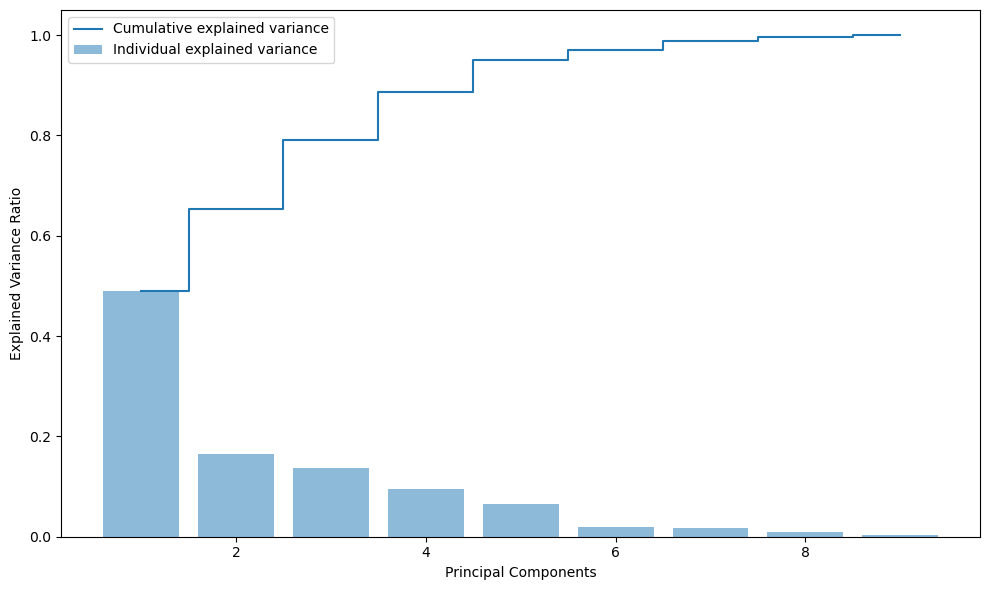

(array([0.48892383, 0.16452848, 0.13756787, 0.09504553, 0.0650032 ,
        0.02011842, 0.01655859, 0.00899467, 0.00325941]),
 array([0.48892383, 0.65345231, 0.79102018, 0.88606572, 0.95106892,
        0.97118734, 0.98774592, 0.99674059, 1.        ]))

In [16]:
# Calculate the explained variance for each principal component
explained_variance=pca.explained_variance_ratio_



# Decide Number of components
# Plotting the explained variance for each principal component

plt.figure( figsize=(10,6))
plt.bar(range(1, len(explained_variance)+1), explained_variance, alpha=0.5, align='center',label='Individual explained variance')
plt.step (range(1, len(explained_variance)+1), np.cumsum(explained_variance),where='mid',label='Cumulative explained variance')
plt.ylabel ('Explained Variance Ratio')
plt.xlabel ('Principal Components')
plt.legend (loc='best')
plt.tight_layout()
plt.show()

explained_variance, np.cumsum(explained_variance)

In [ ]:
""" - each column shows to what percentage the given component describes the date(to what percentage
      the principal components method can imitate the date);
    - our goal is to describe at least 85 90 percent of the date on the graph, these are the first 4 components
    - the array below this plot: the first line describes by what percentage each component describes , 
       the second line is the accumulated value
    - in total, all components describe everything 100 percent"""





In [17]:
# Transform the original data into the principal component space. Using 4 first components
pca=PCA(n_components=4)
df_pca_4component=pca.fit_transform(df_scaled)

df_pca4=pd.DataFrame(data=df_pca_4component, columns=['Principal Component 1',
                                                      'Principal Component 2',
                                                      'Principal Component 3',
                                                      'Principal Component 4'])

df_pca4.head()

,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4
0,-3.177917,-0.251292,-1.011474,0.778804
1,0.434979,-0.218700,-0.292591,-1.391241
2,-0.416784,-0.613870,1.637859,-0.615021
3,-3.306409,1.066649,2.151219,1.698677
4,1.253246,0.547778,-0.136955,-0.716890


In [18]:
df_pca4.describe().round(2)

,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4
count,167.00,167.00,167.00,167.00
mean,0.00,-0.00,0.00,-0.00
std,2.10,1.22,1.12,0.93
min,-4.07,-2.92,-3.05,-1.64
25%,-1.56,-0.81,-0.66,-0.73
50%,0.01,-0.06,-0.19,-0.08
75%,1.46,0.79,0.55,0.78
max,4.20,3.75,3.12,3.16


# K-Means

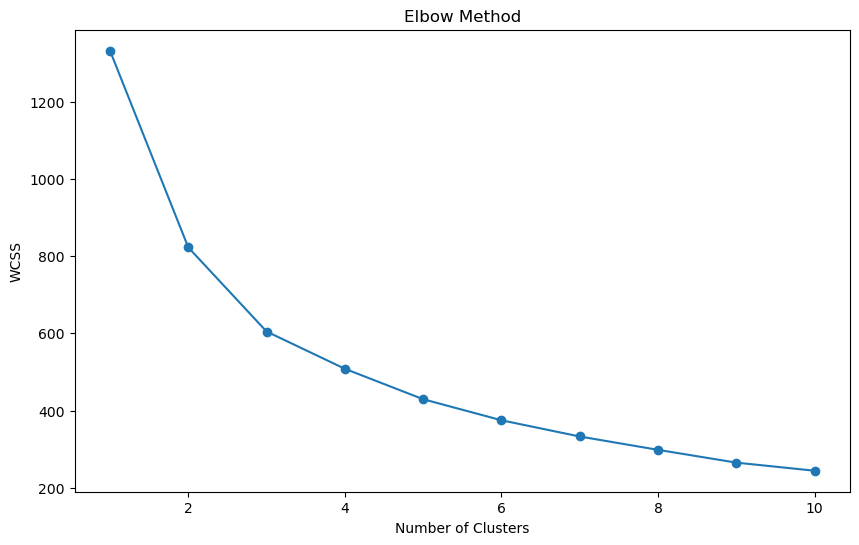

In [19]:
from sklearn.cluster import KMeans

# Elbow Method
# WCSS ( Within-cluster Sum of Squares) for different numbers of clusters
wcss=[]

# trying K-Means with clusters ranging from 1 to 10

for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(df_pca4)
    wcss.append(kmeans.inertia_)

# Plotting the results
plt.figure(figsize=(10,6))
plt.plot(range(1,11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
"""Each iteration creates a new KMeans object with the following parameters:
- n_clusters=i: The number of clusters is equal to the current value of i. 
  In the first iteration there will be 1 cluster, in the second - 2, and so on up to 10 clusters.
- init='k-means++': Uses the k-means++ method to smartly initial select cluster centers,
  which helps speed up the convergence of the algorithm.
- n_init=10: The algorithm is run 10 times with different starting centroids, 
  and the result with the smallest sum of squared distances is selected to cluster centers (inertia).
- kmeans.inertia_: This is an attribute of the KMeans model that contains the value of the
  sum of squared distances from points to the nearest cluster center (inertia). 
  This value indicates how well the clustering model fits the data: the lower the inertia, the better."""

In [20]:
# K-Means Fitting
# Using k=3 as determined from the Elbow method

kmeans=KMeans (n_clusters=3, random_state=42, n_init=10)
kmeans_clusters=kmeans.fit_predict(df_pca4)

# adding the cluster labels to the original df for interpretation

df['Cluster_KMeans']= kmeans_clusters
df.head(30)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_KMeans
0,Afghanistan,90.2,10.00,7.58,44.9,1610.0,9.440,56.2,5.82,553,0
1,Albania,16.6,28.00,6.55,48.6,9930.0,4.490,76.3,1.65,4090,2
2,Algeria,27.3,38.40,4.17,31.4,12900.0,16.100,76.5,2.89,4460,2
3,Angola,119.0,62.30,2.85,42.9,5900.0,22.400,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.50,6.03,58.9,19100.0,1.440,76.8,2.13,12200,2
5,Argentina,14.5,18.90,8.10,16.0,18700.0,20.900,75.8,2.37,10300,2
6,Armenia,18.1,20.80,4.40,45.3,6700.0,7.770,73.3,1.69,3220,2
7,Australia,4.8,19.80,8.73,20.9,41400.0,1.160,82.0,1.93,33130,1
8,Austria,4.3,51.30,11.00,47.8,43200.0,0.873,80.5,1.44,33130,1
9,Azerbaijan,39.2,54.30,5.88,20.7,16000.0,13.800,69.1,1.92,5840,2


In [21]:
df['Cluster_KMeans'].value_counts()

Cluster_KMeans
2    79
0    47
1    41
Name: count, dtype: int64

In [22]:
df.query('Cluster_KMeans==1') # 1=developed

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_KMeans
7,Australia,4.8,19.800,8.73,20.900,41400.0,1.160,82.0,1.93,33130,1
8,Austria,4.3,51.300,11.00,47.800,43200.0,0.873,80.5,1.44,33130,1
10,Bahamas,13.8,35.000,7.89,43.700,22900.0,-0.393,73.8,1.86,28000,1
11,Bahrain,8.6,69.500,4.97,50.900,41100.0,7.440,76.0,2.16,20700,1
15,Belgium,4.5,76.400,10.70,74.700,41100.0,1.880,80.0,1.86,33130,1
23,Brunei,10.5,67.400,2.84,28.000,51967.5,16.700,77.1,1.84,33130,1
29,Canada,5.6,29.100,11.30,31.000,40700.0,2.870,81.3,1.63,33130,1
42,Cyprus,3.6,50.200,5.97,57.500,33900.0,2.010,79.9,1.42,30800,1
43,Czech Republic,3.4,66.000,7.88,62.900,28300.0,-1.430,77.5,1.51,19800,1
44,Denmark,4.1,50.500,11.40,43.600,44000.0,3.220,79.5,1.87,33130,1


In [23]:
df.query('Cluster_KMeans==2') # 2=developing

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_KMeans
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200,2
5,Argentina,14.5,18.9,8.10,16.0,18700.0,20.90,75.8,2.37,10300,2
6,Armenia,18.1,20.8,4.40,45.3,6700.0,7.77,73.3,1.69,3220,2
...,...,...,...,...,...,...,...,...,...,...,...
160,Uruguay,10.6,26.3,8.35,25.4,17100.0,4.91,76.4,2.08,11900,2
161,Uzbekistan,36.3,31.7,5.81,28.5,4240.0,16.50,68.8,2.34,1380,2
162,Vanuatu,29.2,46.6,5.25,52.7,2950.0,2.62,63.0,3.50,2970,2
163,Venezuela,17.1,28.5,4.91,17.6,16500.0,24.16,75.4,2.47,13500,2


In [24]:
df.query('Cluster_KMeans==0') # 1=under-developing

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_KMeans
0,Afghanistan,90.200,10.00,7.58,44.9,1610.0,9.440,56.20,5.8200,553,0
3,Angola,119.000,62.30,2.85,42.9,5900.0,22.400,60.10,6.1600,3530,0
17,Benin,111.000,23.80,4.10,37.2,1820.0,0.885,61.80,5.3600,758,0
21,Botswana,52.500,43.60,8.30,51.3,13300.0,8.920,57.10,2.8800,6350,0
25,Burkina Faso,116.000,19.20,6.74,29.6,1430.0,6.810,57.90,5.8700,575,0
26,Burundi,93.600,8.92,11.60,39.2,764.0,12.300,57.70,6.2600,231,0
28,Cameroon,108.000,22.20,5.13,27.0,2660.0,1.910,57.30,5.1100,1310,0
31,Central African Republic,142.875,11.80,3.98,26.5,888.0,2.010,48.05,5.2100,446,0
32,Chad,142.875,36.80,4.53,43.5,1930.0,6.390,56.50,6.5900,897,0
36,Comoros,88.200,16.50,4.51,51.7,1410.0,3.870,65.90,4.7500,769,0


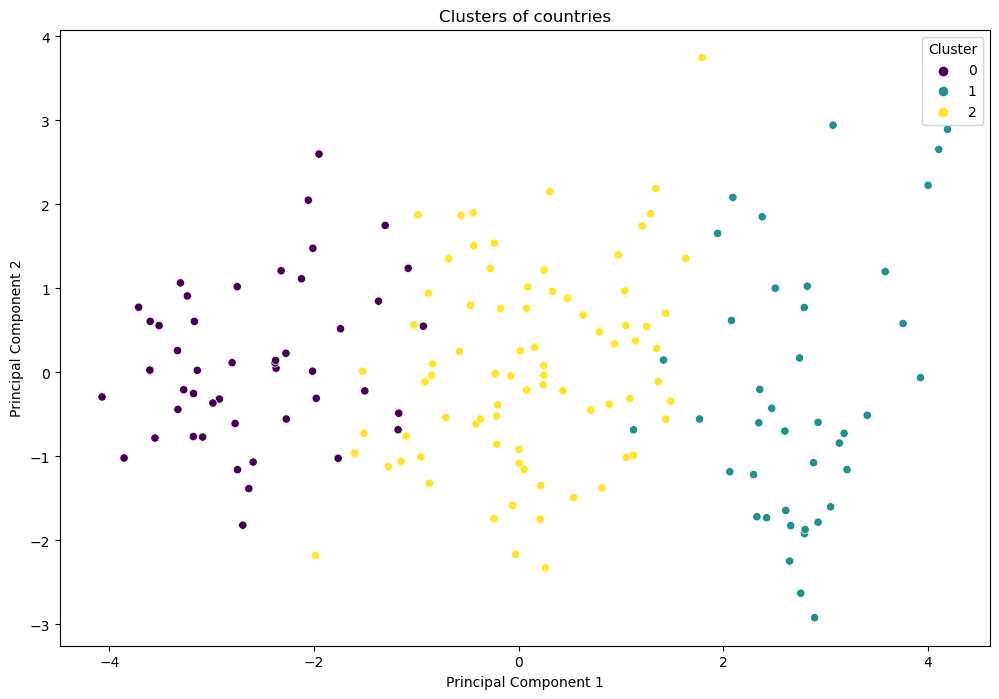

In [25]:
# Visual representation using scatter plots
# We'll use the first two principal components for visualization

df_pca4['Cluster_KMeans']=kmeans_clusters 
# here  added a new column to the dataframe with pca results containing cluster numbers 0 1 2

import seaborn as sns

plt.figure(figsize=(12,8))
sns.scatterplot(x='Principal Component 1',y='Principal Component 2', hue='Cluster_KMeans', palette='viridis', data=df_pca4)
plt.title('Clusters of countries')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

# Hierarchical Method

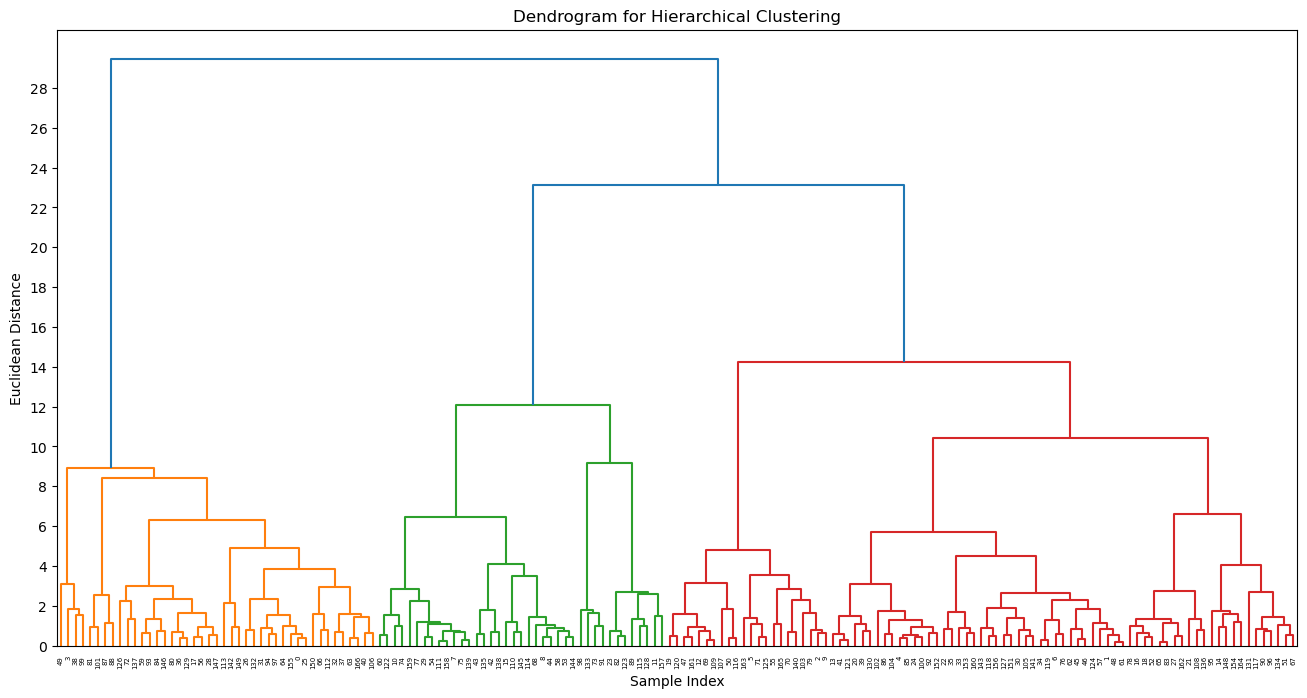

In [26]:
from scipy.cluster.hierarchy import dendrogram, linkage

# create dendrogram
# using ward's method for linkage to minimize the variance between clusters

linked=linkage(df_pca4.drop('Cluster_KMeans', axis=1), method='ward')

# Plotting the dendrogram
plt.figure(figsize=(16,8))
dendrogram(linked, orientation='top', distance_sort='desending', show_leaf_counts=True)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Euclidean Distance')
plt.yticks(list(np.arange(0,30,2)))
plt.show()

In [27]:
from sklearn.cluster import AgglomerativeClustering

# apply hierarchical clustering with 3 clusters

agg_clustering = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
agg_clusters=agg_clustering.fit_predict(df_pca4.drop('Cluster_KMeans', axis=1))

# Cluster analisys
# adding hierarchical cluster label to the original df
df['Cluster_Hierarchical']=agg_clusters
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_KMeans,Cluster_Hierarchical
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553,0,1
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090,2,0
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460,2,0
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530,0,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200,2,0


In [28]:
cols_needed= df.select_dtypes(exclude='object').columns[:9]
df.groupby('Cluster_Hierarchical')[cols_needed].mean().T

Cluster_Hierarchical,0,1,2
child_mort,24.405882,92.797674,5.917949
exports,39.985341,28.165581,51.125641
health,6.109176,6.784651,8.290769
imports,46.676952,44.669767,45.400641
income,11265.411765,3334.953488,39947.179487
inflation,7.228871,9.840116,3.648385
life_expec,72.104706,59.575581,79.748718
total_fer,2.374706,5.073895,1.841026
gdpp,5909.247059,1647.162791,29629.487179


In [ ]:
# so here based on inflation,income, gdpp : 
# 0-developing 1-under-developing 2 - developed